In [50]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv('data/segmented_customers.csv')
display(df.head())
print(df.info())

,customer_id,gender,age,annual_income,spending_score
0,1,1,19.0,15.0,39.0
1,2,1,21.0,15.0,81.0
2,3,0,20.0,16.0,6.0
3,4,0,23.0,16.0,77.0
4,5,0,31.0,17.0,40.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     200 non-null    int64  
 1   gender          200 non-null    int64  
 2   age             200 non-null    float64
 3   annual_income   200 non-null    float64
 4   spending_score  200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB
None


In [51]:
df[df.isna().any(axis=1)]

,customer_id,gender,age,annual_income,spending_score


In [52]:
df = df.dropna()

df.rename(columns = {'CustomerID' : 'customer_id',
                     'Gender' : 'gender',
                     'Age' : 'age',
                     'Annual Income (k$)' : 'annual_income',
                     'Spending Score (1-100)' : 'spending_score'}, inplace = True)

In [53]:
import plotly
import plotly.express as px

fig = px.scatter_3d(
    data_frame = df,
    x = 'age',
    y = 'annual_income',
    z = 'spending_score',
    width = 1000,
    height = 700
)

fig.show()

In [54]:
def go_3d(df, clust_res):
    fig = px.scatter_3d(
        data_frame = df,
        x = 'age',
        y = 'annual_income',
        z = 'spending_score',
        color = clust_res,
        width = 1000,
        height = 700
    )
    return fig

In [55]:
X = df[['age', 'annual_income', 'spending_score']]

In [56]:
import seaborn as sns
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=15, min_samples=15)
clustering = dbscan.fit_predict(X)
df['dbscan_res_def'] = clustering

go_3d(df, 'dbscan_res_def').show()



In [57]:
from sklearn.cluster import AgglomerativeClustering

def get_aggl_clustering(X, n_clusters):
    agglomerative_clustering = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward')
    agglomerative_clustering.fit(X)
    aggl_prediction = agglomerative_clustering.labels_
    return aggl_prediction

df['aggl'] = get_aggl_clustering(df, 3)

go_3d(df, 'aggl').show()

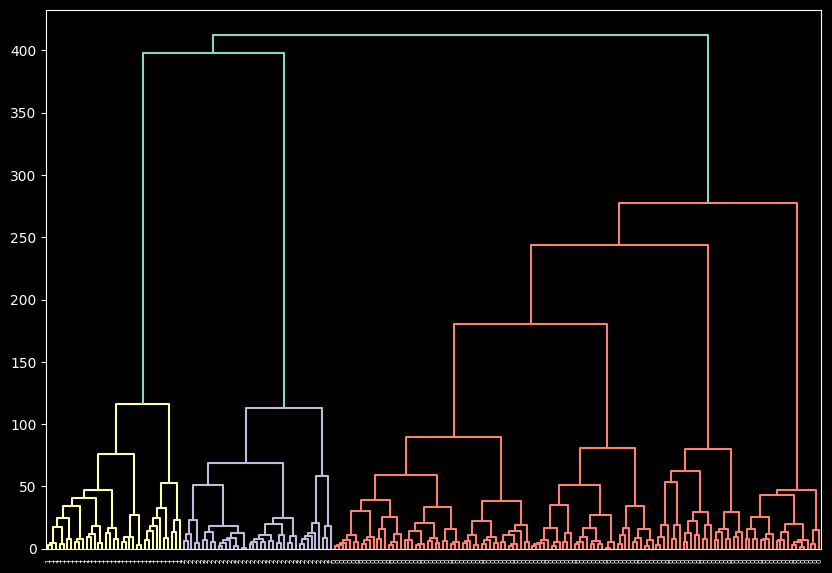

In [58]:
# импортируем библиотеку scipy, чтобы визуализировать дендрограмму
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# запускаем агломеративную кластеризацию и сохраним результаты в df
df['aggl'] = get_aggl_clustering(X, 3)

linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=df['aggl'].to_list(),
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

In [59]:
df['aggl'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)

go_3d(df, 'aggl')

[0.293166070535953,
 0.3839349967742105,
 0.40546302077733304,
 0.44446409171786105,
 0.4523566166018854,
 0.4398198217929885,
 0.42977587111050725,
 0.41443894953771165]

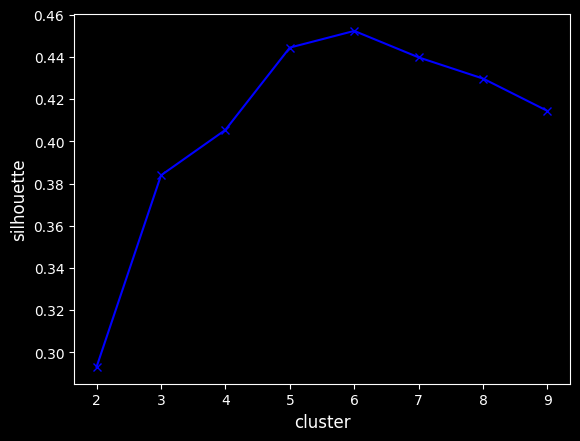

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouettes = []
for cluster_num in range(2, 10):
    silhouettes.append(get_silhouette(cluster_num, X))
    
display(silhouettes)

plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
plt.plot([i for i in range(2,10)], silhouettes, 'xb-')

In [63]:
df['cluster'] = pd.read_csv('data/segmented_customers_cluster.csv').cluster
df.head()

,customer_id,gender,age,annual_income,spending_score,dbscan_res_def,aggl,cluster
0,1,1,19.0,15.0,39.0,-1,4,3
1,2,1,21.0,15.0,81.0,0,3,4
2,3,0,20.0,16.0,6.0,-1,4,3
3,4,0,23.0,16.0,77.0,0,3,4
4,5,0,31.0,17.0,40.0,-1,4,3


In [64]:
from sklearn.metrics.cluster import completeness_score

print(completeness_score(labels_true=df.cluster, labels_pred=df.aggl))

0.9858363091910892
